# **Marketing Project**

# **Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns


# Table of Contents:
#### - [0. Data Preprocess](#data-preprocess)
#### - [1. Behavioral Customer Segmentation](#behavioral-customer-segmentation) 
#### - [2. Pricing Analysis](#pricing-analysis)  
#### - [3. Need-Based Segmentation](#need-based-segmentation)  
  

# **0. Data Preprocess** <a id="data-preprocess"></a>

In [2]:
# Load the dataset from the uploaded file
file_path = './raw_results.csv'
survey_data = pd.read_csv(file_path)
# Display the first few rows and general info about the dataset
survey_data.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Sr.No.,Response No,1.Have you ever participated in an outdoor or ...,2.Which of the events have you ever attended?,NaN,NaN,NaN,NaN,3.How many times per year do you typically att...,4.What is your main motivation for attending t...,...,"24.I’d rather have one excellent, well-managed...",25.I prefer a basic location if it offers grea...,"26.If all these factors (Price, Visual Appeal,...",27.Which single factor most often influences y...,28.Which of these statements best describes yo...,29.I often decide whether to attend an event b...,30.If you found an event that matched all your...,31.Gender,32.Age,Timestamp
1,NaN,NaN,,Horseback Riding,Surfing,Hiking,Skiing,NaN,,,...,,,,,,,,,,NaN
2,1,1,Yes,NaN,NaN,NaN,Skiing,NaN,1-2 times,Adventure and excitement,...,7,4,7,Outstanding visual and Appealing atmosphere,Experience-Focused: I’m happy to pay more for ...,7,7,Female,36,12/25/2024 08:24
3,2,2,Yes,NaN,NaN,NaN,NaN,None of the above,3-5 times,Adventure and excitement,...,7,5,7,Broad choice of activities,Experience-Focused: I’m happy to pay more for ...,6,7,Female,33,12/25/2024 10:04
4,3,3,Yes,NaN,NaN,Hiking,NaN,NaN,1-2 times,Adventure and excitement,...,7,4,6,Broad choice of activities,Experience-Focused: I’m happy to pay more for ...,6,7,Male,24,12/25/2024 10:39


In [3]:
# Extract the first row as column headers
columns = survey_data.iloc[0]
survey_data_cleaned = survey_data[1:]  # Remove the first row from the data

# Assign new column names
survey_data_cleaned.columns = columns

# Reset index for better organization
survey_data_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned column names for user verification
survey_data_cleaned.columns.tolist()


['Sr.No.',
 'Response No',
 '1.Have you ever participated in an outdoor or adventure event (e.g., surfing, hiking, horseback riding, skiing)?',
 '2.Which of the events have you ever attended?',
 nan,
 nan,
 nan,
 nan,
 '3.How many times per year do you typically attend such events?',
 '4.What is your main motivation for attending these events?',
 '5.How important is the event’s overall cost to you?',
 '6.How important is the environment’s visual and thematic appeal to you?',
 '7.How important is a scenic, easily accessible location when choosing an event?',
 '8.How important are additional amenities (e.g., food, music, freebies) to your enjoyment?',
 '9.How important is having a range of different activities within the same event?',
 '15.€20',
 '16.€30',
 '17.€40',
 '18.€50',
 '19.€60',
 '10.€75',
 '11.€100',
 '12.€125',
 '13.€150',
 '14.€175',
 '20.I’m willing to pay more if the visuals and the atmosphere of the event is particularly outstanding.',
 '21.I would pay more if the locatio

In [4]:
# Drop the first row & 2 columns
survey_data_cleaned.drop(0, axis=0, inplace=True)
survey_data_cleaned = survey_data_cleaned.drop(columns=['Sr.No.','Response No'])
# Fixing column names
survey_data_cleaned.columns.values[0] = '1. Participated'
survey_data_cleaned.columns.values[1] = '2. Events'
survey_data_cleaned.columns.values[6] = '3. Frequency'
survey_data_cleaned.columns.values[7] = '4. Motivation'
survey_data_cleaned.columns.values[8] = '5. Cost importance'
survey_data_cleaned.columns.values[9] = '6. Appeals importance'
survey_data_cleaned.columns.values[10] = '7. Accessibility importance'
survey_data_cleaned.columns.values[11] = '8. Amenities importance'
survey_data_cleaned.columns.values[12] = '9. Activities importance'
survey_data_cleaned.columns.values[23] = '10. Pay extra for atmosphere'
survey_data_cleaned.columns.values[24] = '11. Pay extra for location'
survey_data_cleaned.columns.values[25] = '12. Pay extra for amenities'
survey_data_cleaned.columns.values[26] = '13. Pay extra for activities'
survey_data_cleaned.columns.values[27] = '14. Activities over everything else'
survey_data_cleaned.columns.values[28] = '15. Amenities over everything else'
survey_data_cleaned.columns.values[29] = '16. Everything must be perfect'
survey_data_cleaned.columns.values[30] = '17. Single important factor'
survey_data_cleaned.columns.values[31] = '18. Attitude towards paying'
survey_data_cleaned.columns.values[32] = '19. decide on friends’ or social media recom'
survey_data_cleaned.columns.values[33] = '20. Your recommendation'
survey_data_cleaned.columns.values[34] = '21. Gender'
survey_data_cleaned.columns.values[35] = '22. Age'
survey_data_cleaned.columns.values[36] = '23. Timestamp'
survey_data_cleaned.columns.tolist()


/var/folders/0j/9c1djdg57yqghf3xt5yxmgnw0000gn/T/ipykernel_7422/1087974520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_data_cleaned.drop(0, axis=0, inplace=True)


['1. Participated',
 '2. Events',
 nan,
 nan,
 nan,
 nan,
 '3. Frequency',
 '4. Motivation',
 '5. Cost importance',
 '6. Appeals importance',
 '7. Accessibility importance',
 '8. Amenities importance',
 '9. Activities importance',
 '15.€20',
 '16.€30',
 '17.€40',
 '18.€50',
 '19.€60',
 '10.€75',
 '11.€100',
 '12.€125',
 '13.€150',
 '14.€175',
 '10. Pay extra for atmosphere',
 '11. Pay extra for location',
 '12. Pay extra for amenities',
 '13. Pay extra for activities',
 '14. Activities over everything else',
 '15. Amenities over everything else',
 '16. Everything must be perfect',
 '17. Single important factor',
 '18. Attitude towards paying',
 '19. decide on friends’ or social media recom',
 '20. Your recommendation',
 '21. Gender',
 '22. Age',
 '23. Timestamp']

In [5]:
survey_data_cleaned.loc[::,'2. Events':survey_data_cleaned.columns.values[5]:1]


,2. Events,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Skiing,NaN
2,NaN,NaN,NaN,NaN,None of the above
3,NaN,NaN,Hiking,NaN,NaN
4,Horseback Riding,NaN,NaN,NaN,NaN
5,NaN,NaN,Hiking,NaN,NaN
...,...,...,...,...,...
65,NaN,NaN,Hiking,NaN,NaN
66,NaN,NaN,NaN,NaN,None of the above
67,NaN,NaN,NaN,NaN,None of the above
68,Horseback Riding,NaN,NaN,NaN,NaN


### Done already

In [6]:
#Q1 --------------------
# Convert the first question to binary (assuming "Yes" -> 1, "No" -> 0)
survey_data_cleaned['1. Participated'] = survey_data_cleaned['1. Participated'].apply(lambda x: 1 if x == 'Yes' else 0)


#Q2 ----------------------
change_list = ['2. Events', 'Surfing', 'Hiking', 'Skiing', 'None of the above']
# fixing column names of Q2 and the NaN values
survey_data_cleaned.columns.values[1:6] = change_list

# Function to consolidate values from all columns into one
def consolidate_events(row):
    # Drop NaN values and join the remaining words into a single string
    events = row[change_list].dropna().tolist()
    
    # If no valid events, add 'None of the above'
    if not events:
        events.append('None of the above')
    
    # Join the list into a string
    return ', '.join(events)

# Apply the function across all rows
survey_data_cleaned['2. Events'] = survey_data_cleaned.loc[::,'2. Events':survey_data_cleaned.columns.values[5]:1].apply(consolidate_events, axis=1)
survey_data_cleaned.drop(columns=['Surfing', 'Hiking', 'Skiing', 'None of the above'], inplace=True)

#Q3 ----------------------
def map_frequency(value):
    if value == '0 times':
        return 0
    elif value == '1-2 times':
        return 1  # Midpoint of the range
    elif value == '3-5 times':
        return 2  # Midpoint of the range
    elif value == '6+ times':
        return 3  # Or any number representing '6+'
    return 0  # In case there are unexpected values

# Apply the mapping function to the 'Frequency' column
survey_data_cleaned['3. Frequency'] = survey_data_cleaned['3. Frequency'].apply(map_frequency)

#Q4 ----------------------
survey_data_cleaned = pd.get_dummies(survey_data_cleaned, columns=['4. Motivation'], dtype='int')

#Q10-19 ---------------------
# Step 1: Identify columns matching the pattern `number.€price`
import re

def is_price_column(col_name):
    # Check if the column matches the pattern `number.€price`
    return bool(re.match(r'^\d+\.\€\d+$', col_name))

# Filter the columns that are price-related
price_columns = [col for col in survey_data_cleaned.columns if is_price_column(col)]
price_columns

# Step 2: Extract the numeric price from column names
price_mapping = {col: float(col.split('.')[1].strip('€')) for col in price_columns}

# Rename only the price columns
survey_data_cleaned.rename(columns=price_mapping, inplace=True)
# Step 3: Create a function to get min and max prices where response is "Yes, I would buy." or "Yes, I would buy"
def get_min_max_prices(row):
    # Extract prices where the response is "Yes, I would buy." OR "Yes, I would buy"
    yes_prices = [
        price for price in price_mapping.values()
        if row.get(price) in ["Yes, I would buy.", "Yes, I would buy"]
    ]
    if yes_prices:
        return pd.Series([min(yes_prices), max(yes_prices)])
    return pd.Series([0, 0])
# Step 4: Apply the function to the DataFrame

survey_data_cleaned[['min_total_price', 'max_total_price']] = survey_data_cleaned.apply(get_min_max_prices, axis=1)
survey_data_cleaned[['min_surfing_price', 'max_surfing_price']] = survey_data_cleaned.iloc[:,13:18].apply(get_min_max_prices, axis=1)
survey_data_cleaned[['min_horse_price', 'max_horse_price']] = survey_data_cleaned.iloc[:,8:13].apply(get_min_max_prices, axis=1)

survey_data_cleaned.drop(columns=[75.0, 100.0, 125.0, 150.0, 175.0, 20.0, 30.0, 40.0, 50.0, 60.0], inplace=True)

#Q17 ----------------------
survey_data_cleaned = pd.get_dummies(survey_data_cleaned, columns=['17. Single important factor'], dtype='int')

#Q18 ---------------------
def map_frequency_q18(value):
    if value == 'Cost-Focused: I tend to choose the cheapest options':
        return 1
    elif value == 'Spontaneous: It varies; I decide case by case':
        return 2  # Midpoint of the range
    elif value == 'Balanced: I pay more only if it truly seems worth it':
        return 3  # Midpoint of the range
    elif value == "Experience-Focused: I’m happy to pay more for a unique experience":
        return 4  # Or any number representing '6+'
    return 0  # In case there are unexpected values

# Apply the mapping function to the 'Frequency' column
survey_data_cleaned['18. Attitude towards paying'] = survey_data_cleaned['18. Attitude towards paying'].apply(map_frequency_q18)


### Converting the Categorical columns (2. Events, 21. Gender)

In [7]:
survey_data_cleaned["21. Gender"] = survey_data_cleaned["21. Gender"].map({"Male": 0, "Female": 1})  # Convert Gender to 0/1
survey_data_cleaned = pd.get_dummies(survey_data_cleaned, columns=["2. Events"], dtype='int')  # One-hot encode "Events" column

#Q5 ----------------------
#Q6 ----------------------
#Q7 ----------------------
#Q8 ----------------------
#Q9 ----------------------

#Q20 ---------------------
#Q21 ---------------------
#Q22 ---------------------

# Show the updated DataFrame
survey_data_cleaned.head()


,1. Participated,3. Frequency,5. Cost importance,6. Appeals importance,7. Accessibility importance,8. Amenities importance,9. Activities importance,10. Pay extra for atmosphere,11. Pay extra for location,12. Pay extra for amenities,...,2. Events_Hiking,"2. Events_Hiking, Skiing",2. Events_Horseback Riding,"2. Events_Horseback Riding, Hiking","2. Events_Horseback Riding, Hiking, Skiing",2. Events_None of the above,2. Events_Skiing,2. Events_Surfing,"2. Events_Surfing, Hiking","2. Events_Surfing, Skiing"
1,1,1,6,6,7,7,6,7,7,7,...,0,0,0,0,0,0,1,0,0,0
2,1,2,5,3,6,5,4,7,1,6,...,0,0,0,0,0,1,0,0,0,0
3,1,1,4,6,5,6,4,5,6,5,...,1,0,0,0,0,0,0,0,0,0
4,1,1,4,6,6,6,6,5,6,4,...,0,0,1,0,0,0,0,0,0,0
5,1,2,5,6,4,3,5,4,5,4,...,1,0,0,0,0,0,0,0,0,0


In [8]:
# Save the result DataFrame to an Excel file
survey_data_cleaned.to_excel("survey_data_cleaned.xlsx", index=False)

print("File saved successfully as 'survey_results.xlsx'")


File saved successfully as 'survey_results.xlsx'


# **1. Behavioral Customer Segmentation** <a id="behavioral-customer-segmentation"></a>

### 1.1 RFM

### Recency, Frequency and Monetary

'''Recency → How recently the customer attended an event (Column: "1. Participated")

Frequency → How often they attend events (Column: "3. Frequency")

Monetary → Their willingness to pay or cost importance (Column: "5. Cost importance" or min/max price columns)'''


In [9]:
# Selecting relevant RFM features
rfm = survey_data_cleaned[["1. Participated", "3. Frequency", 'min_total_price', 'max_total_price']].copy()
# Calculating Monetary value (average of min and max total price)
rfm['Monetary'] = (rfm['min_total_price'] + rfm['max_total_price']) / 2
rfm.drop(columns=['min_total_price', 'max_total_price'], inplace=True)
rfm.columns = ["Recency", "Frequency", "Monetary"]  # Rename for clarity


In [10]:
# Data Normalization 
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

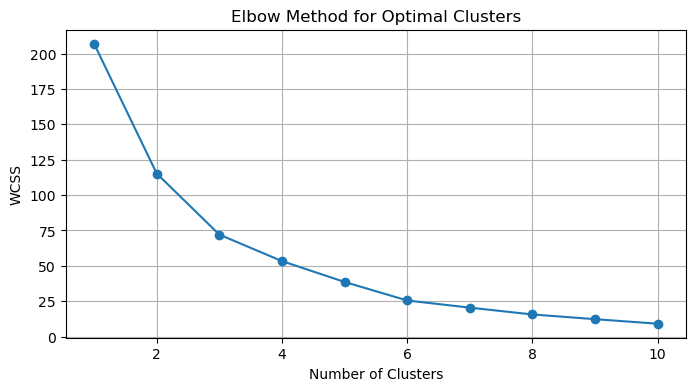

In [11]:
# Determining the Optimal Number of Clusters using the Elbow Method
wcss = [] # Within-Cluster Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


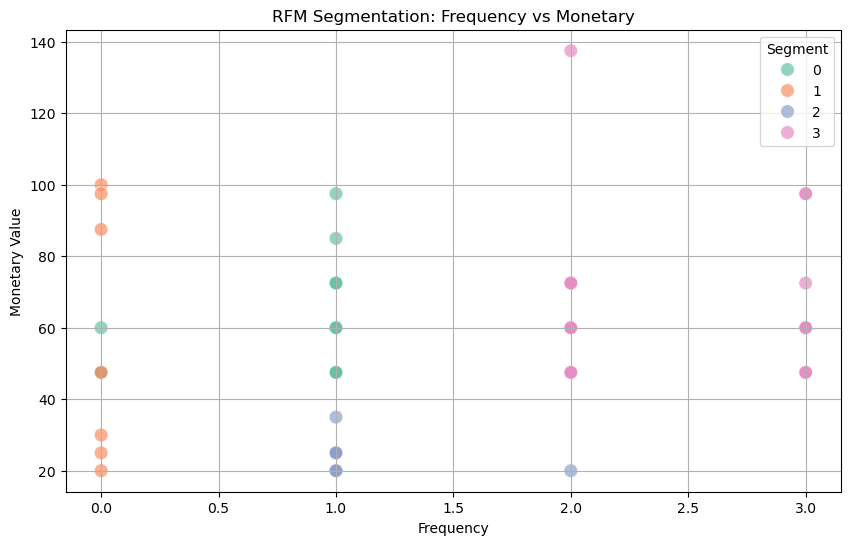

In [12]:
# Applying K-means Clustering
# Based on the elbow plot, choosing 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['RFM_Segment'] = kmeans.fit_predict(rfm_scaled)

# Visualizing the Segmentation: Scatter Plot of Frequency vs Monetary Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='RFM_Segment', data=rfm, palette='Set2', s=100, alpha=0.7)
plt.title('RFM Segmentation: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Segment')
plt.grid(True)
plt.show()


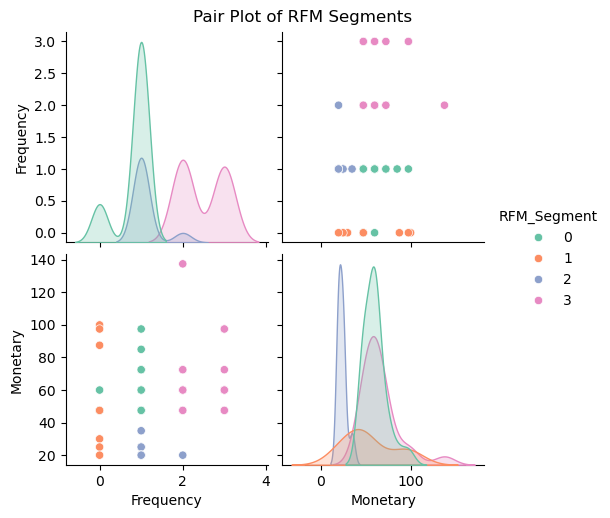

In [13]:
# Additional Visualization 1: Pair Plot to Observe Clusters
sns.pairplot(rfm, vars=['Frequency', 'Monetary'], hue='RFM_Segment', palette='Set2')
plt.suptitle('Pair Plot of RFM Segments', y=1.02)
plt.show()


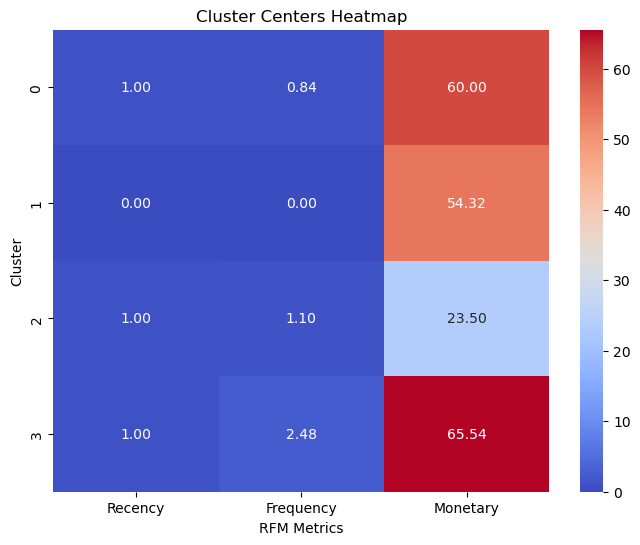

In [14]:
# Additional Visualization 2: Cluster Centers Heatmap
# Calculating Cluster Centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=['Recency','Frequency', 'Monetary'])

plt.figure(figsize=(8, 6))
sns.heatmap(centers_df, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Centers Heatmap')
plt.xlabel('RFM Metrics')
plt.ylabel('Cluster')
plt.show()


In [15]:
# Analyze segments
segment_summary = rfm.groupby('RFM_Segment').agg({
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).reset_index()

print(segment_summary)


  RFM_Segment Frequency   Monetary      
                   mean       mean count
0           0  0.840000  60.000000    25
1           1  0.000000  54.318182    11
2           2  1.100000  23.500000    10
3           3  2.478261  65.543478    23


### **1.2 RFM Segment Distribution Bar Plot**

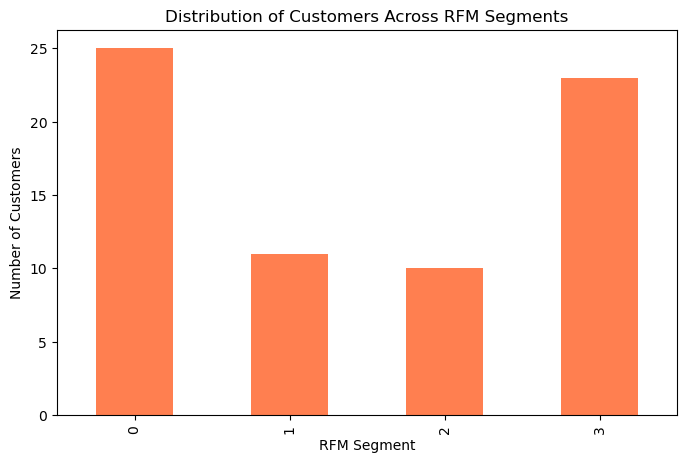

In [16]:
plt.figure(figsize=(8, 5))
rfm['RFM_Segment'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.xlabel("RFM Segment")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers Across RFM Segments")
plt.show()


# **2. Pricing Analysis** <a id="pricing-analysis"></a>



### 2.1 Introduction
This analysis focuses on **optimal pricing strategies** for **Surfing and Horse Riding** using:
- **Revenue Maximization**
- **Optimal Price Selection**
- **Comparison of Different Price Points**

We used **valid price levels** for each activity:
- **Surfing:** 75€, 100€, 125€, 150€, 175€
- **Horse Riding:** 20€, 30€, 40€, 50€, 60€

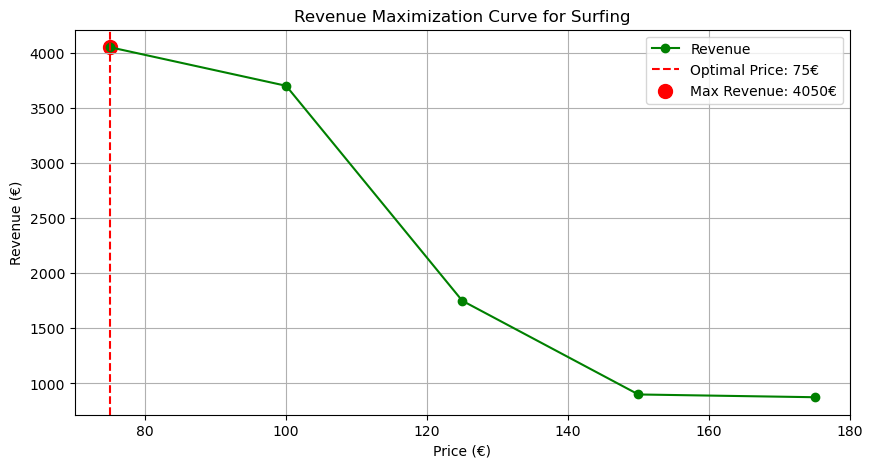

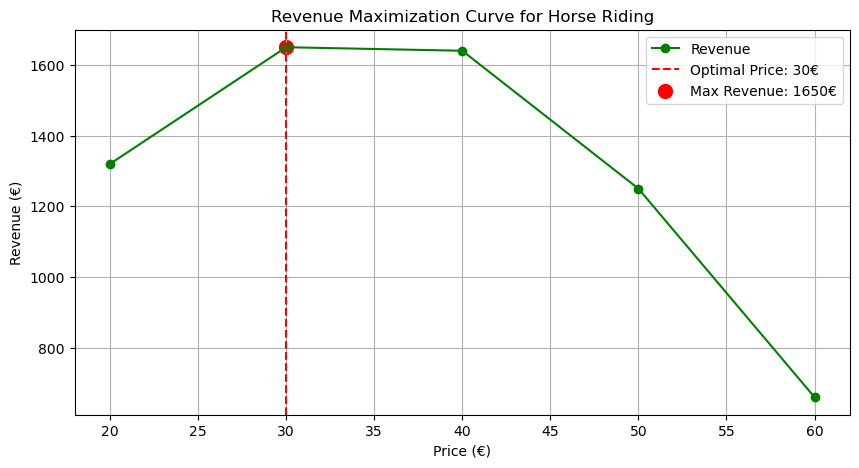


📌 **Optimal Pricing Results**
🔹 **Surfing**: Optimal Price = 75 €, Max Revenue = 4050 €, Customers = 54
🔹 **Horse Riding**: Optimal Price = 30 €, Max Revenue = 1650 €, Customers = 55


In [17]:
pricing_df = survey_data_cleaned.copy()

valid_prices = {
    "surfing": [75, 100, 125, 150, 175],
    "horse_riding": [20, 30, 40, 50, 60]
}

def compute_revenue(price_levels, event):
    """Computes revenue at each price level based on users willing to pay that amount."""
    revenues = []
    willing_customers = []

    for price in price_levels:
        willing_to_pay = pricing_df[(pricing_df[f"min_{event}_price"] <= price) & 
                                    (pricing_df[f"max_{event}_price"] >= price)]
        revenue = price * len(willing_to_pay)
        revenues.append(revenue)
        willing_customers.append(len(willing_to_pay))

    return revenues, willing_customers

# Compute revenues and number of customers for valid price levels
surfing_revenues, surfing_customers = compute_revenue(valid_prices["surfing"], "surfing")
horse_revenues, horse_customers = compute_revenue(valid_prices["horse_riding"], "horse")

# Step 3: Identify the optimal price that maximizes revenue
def find_optimal_price(price_levels, revenues, customers):
    """Finds the price level with the highest revenue and returns details."""
    max_index = np.argmax(revenues)
    optimal_price = price_levels[max_index]
    max_revenue = revenues[max_index]
    num_customers = customers[max_index]

    return optimal_price, max_revenue, num_customers

# Get optimal prices for Surfing and Horse Riding
optimal_surfing_price, max_surfing_revenue, surfing_customers_at_optimal = find_optimal_price(valid_prices["surfing"], surfing_revenues, surfing_customers)
optimal_horse_price, max_horse_revenue, horse_customers_at_optimal = find_optimal_price(valid_prices["horse_riding"], horse_revenues, horse_customers)

# Step 4: Plot Revenue Curves with Optimal Price
def plot_revenue_curve(price_levels, revenues, optimal_price, max_revenue, title):
    """Plots the revenue maximization curve and marks the optimal price."""
    plt.figure(figsize=(10, 5))
    plt.plot(price_levels, revenues, marker='o', linestyle='-', color='green', label="Revenue")
    plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: {optimal_price}€')
    plt.scatter(optimal_price, max_revenue, color='red', s=100, label=f"Max Revenue: {max_revenue}€")
    plt.xlabel("Price (€)")
    plt.ylabel("Revenue (€)")
    plt.title(f"Revenue Maximization Curve for {title}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Surfing and Horse Riding
plot_revenue_curve(valid_prices["surfing"], surfing_revenues, optimal_surfing_price, max_surfing_revenue, "Surfing")
plot_revenue_curve(valid_prices["horse_riding"], horse_revenues, optimal_horse_price, max_horse_revenue, "Horse Riding")

# Step 5: Print the optimal price findings
print("\n📌 **Optimal Pricing Results**")
print(f"🔹 **Surfing**: Optimal Price = {optimal_surfing_price} €, Max Revenue = {max_surfing_revenue} €, Customers = {surfing_customers_at_optimal}")
print(f"🔹 **Horse Riding**: Optimal Price = {optimal_horse_price} €, Max Revenue = {max_horse_revenue} €, Customers = {horse_customers_at_optimal}")


### 2.2 Revenue Maximization Results
#### 🔹 Surfing
- Optimal Price: **75€**
- Max Revenue: **4050€**
- Demand sharply declines after 75€, causing a revenue drop.
- Pricing above 75€ reduces total revenue significantly.
  
💡 **Insight:** 75€ is the best trade-off between price and demand. Setting a higher price causes a sharp decline in customers. Increasing prices beyond 75€ reduces customer willingness to pay, leading to lower revenue.

#### 🔹 Horse Riding
- Optimal Price: **30€**
- Max Revenue: **1650€**
- Revenue remains stable at 40€, but drops significantly at 50€.
- Lower prices attract more customers, maximizing revenue.
  
💡 **Insight:** 30€ is the best price, but 40€ might also be a good alternative as revenue is stable before dropping at 50€.

---

### **2.3 Interpretation & Business Logic**
| Sport | Expected Behavior | Model Matches? |
|--------|-----------------|----------------|
| **Surfing** | Luxury activity → People willing to pay more, but demand drops at high prices | ✅ Yes, demand collapses after 75€ |
| **Horse Riding** | More accessible → Larger audience willing to pay, but price-sensitive | ✅ Yes, price sensitivity is clear after 40€ |

✅ Our model successfully identifies revenue-maximizing price points while respecting customer behavior.

---


# **3. Need-Based Segmentation** <a id="need-based-segmentation"></a>

## **Explanations**

**1. Introduction**

The goal of this project was to perform Needs-Based Segmentation on customer survey data to identify distinct customer groups based on their preferences, motivations, and attitudes toward event-related services. This segmentation helps in tailoring marketing strategies, improving product offerings, and enhancing customer satisfaction by addressing specific needs of different segments.

**2. Objectives**

1. To identify clusters of customers with similar needs and preferences.

2. To understand the key factors driving customer decisions.

3. To support targeted marketing and personalized communication strategies.

**3. Methodology**

We applied the K-Means clustering algorithm to segment customers based on survey responses. The steps involved were:

1. Data Preprocessing: Ensuring all selected features were numeric, handling missing values, and standardizing data.

2. Feature Selection: Choosing relevant features that reflect customer needs and preferences.

3. Clustering: Applying the K-Means algorithm to group customers into clusters.

4. Evaluation: Using the Elbow Method and Silhouette Score to determine the optimal number of clusters.

5. Visualization: Using PCA (Principal Component Analysis) to visualize clusters in a two-dimensional space.

6. Prediction: Implementing a function to predict the segment of new customers based on their responses.

## **3.1. Feature Selection**

- **Cost Importance (5):** Reflects how sensitive customers are to pricing, crucial for identifying price-conscious segments.

- **Appeals Importance (6), Accessibility Importance (7), Amenities Importance (8), Activities Importance (9):** These features indicate the importance customers place on different event attributes, helping identify what drives their satisfaction.

- **Willingness to Pay Extra (10-13):** Measures how much value customers place on specific event aspects, indicating premium or budget preferences.

- **Prioritization Factors (14-16):** Highlights what customers consider most critical, whether it’s activities, amenities, or overall perfection.

- **Attitude Towards Paying (18):** Reflects general spending behavior, useful for distinguishing budget-conscious from premium-seeking customers.

- **Decision Influencers (19):** Shows the impact of social recommendations on customer choices.

- **Demographics (21, 22):** Gender and Age help in understanding demographic patterns within segments.

- **Motivations (4 Series):** Captures the primary reasons for attending events, essential for understanding underlying customer needs.

- **Single Important Factors (17 Series):** Identifies the single most important factor for each customer, critical for need-based differentiation.

In [18]:
# Relevant columns for Needs-Based segmentation
features = [
    '5. Cost importance',
    '6. Appeals importance',
    '7. Accessibility importance',
    '8. Amenities importance',
    '9. Activities importance',
    '10. Pay extra for atmosphere',
    '11. Pay extra for location',
    '12. Pay extra for amenities',
    '13. Pay extra for activities',
    '14. Activities over everything else',
    '15. Amenities over everything else',
    '16. Everything must be perfect',
    '18. Attitude towards paying',
    '19. decide on friends’ or social media recom',
    '21. Gender',
    '22. Age',
    '4. Motivation_Adventure and excitement',
    '4. Motivation_Other (please only choose if fits best)',
    '4. Motivation_Relaxation and escaping routine',
    '4. Motivation_Socializing and meeting new people',
    '17. Single important factor_Broad choice of activities',
    '17. Single important factor_Convenient or appealing location',
    '17. Single important factor_High-quality amenities',
    '17. Single important factor_Lowest price',
    '17. Single important factor_Others',
    '17. Single important factor_Outstanding visual and Appealing atmosphere'
]

# Ensure all relevant columns are numeric
data_cluster = survey_data_cleaned[features].apply(pd.to_numeric, errors='coerce')
#data_cluster = survey_data_cleaned[features].copy()


## **3.2. Clustering**

### **3.2.1.Standardization:**

In [19]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster.fillna(0))  # Handling NaN values


### **3.2.2.K-Means, Elbow Method, Silhouette**

- **K-Means Algorithm:** The algorithm was run for cluster numbers ranging from 2 to 10.

- **Elbow Method:** Plotted the Within-Cluster Sum of Squares (WCSS) to find the point where adding more clusters doesn’t significantly reduce variance.

- **Silhouette Score:** Measured the quality of clustering, with higher scores indicating well-defined clusters.

In [20]:
# Elbow Method & Silhouette Score to find the optimal number of clusters
wcss = []
silhouette_scores = []

for k in range(2, 11):  # Starting from 2 since silhouette score isn't defined for 1 cluster
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


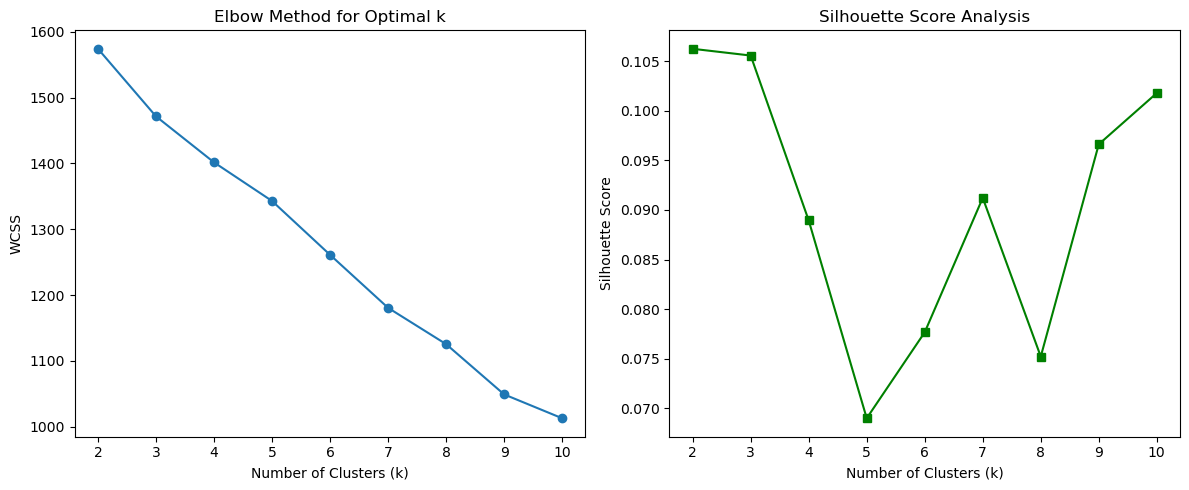

In [21]:
# Plotting the Elbow Method
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='s', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')

plt.tight_layout()
plt.show()


### Optimal Clusters (highest Silhouette Score)

In [22]:
# Determine the optimal k based on the highest Silhouette Score
optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")


Optimal number of clusters based on Silhouette Score: 2


In [23]:
# Apply K-Means with the optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
survey_data_cleaned["Needs_Cluster"] = kmeans_final.fit_predict(data_scaled)


In [24]:
# Save the clustered data
survey_data_cleaned.to_csv("needs_based_optimal_clusters.csv", index=False)


In [25]:
# Display cluster averages
numeric_features = survey_data_cleaned[features].select_dtypes(include=[np.number]).columns
print(survey_data_cleaned.groupby("Needs_Cluster")[numeric_features].mean())


               18. Attitude towards paying  21. Gender  \
Needs_Cluster                                            
0                                 3.050000    0.425000   
1                                 2.344828    0.413793   

               4. Motivation_Adventure and excitement  \
Needs_Cluster                                           
0                                            0.475000   
1                                            0.275862   

               4. Motivation_Other (please only choose if fits best)  \
Needs_Cluster                                                          
0                                                       0.000000       
1                                                       0.068966       

               4. Motivation_Relaxation and escaping routine  \
Needs_Cluster                                                  
0                                                   0.325000   
1                                                   0.586

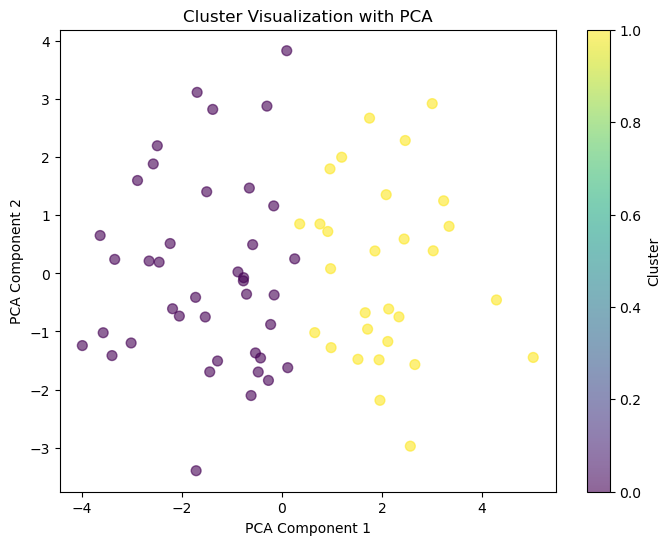

In [26]:
# Plotting Clusters with PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], 
                      reduced_data[:, 1], 
                      c=survey_data_cleaned["Needs_Cluster"], 
                      cmap='viridis', 
                      s=50, 
                      alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization with PCA')
plt.show()


## **3.3. Plots**

### **3.3.1. Segmentation Based on the Main 5 Related Columns**

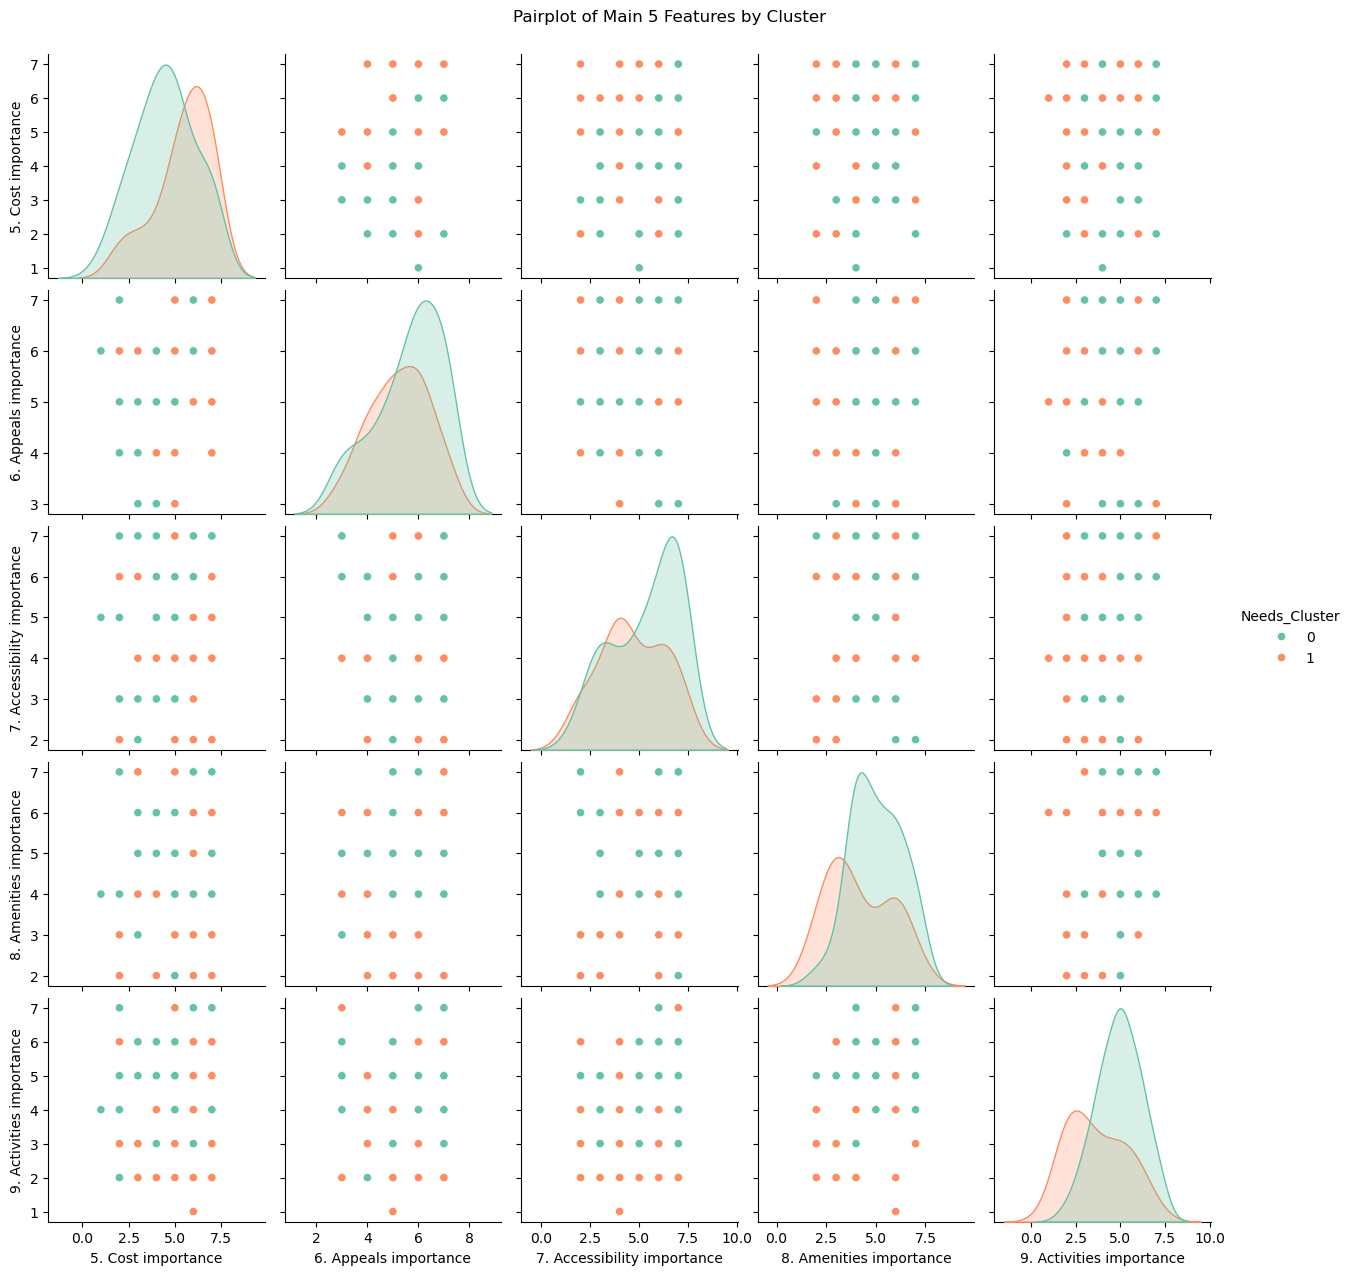

In [27]:
main_features = [
'5. Cost importance', 
'6. Appeals importance', 
'7. Accessibility importance',
'8. Amenities importance', 
'9. Activities importance'
]

# Convert Needs_Cluster to string for categorical plotting
survey_data_cleaned[main_features] = survey_data_cleaned[main_features].apply(pd.to_numeric, errors='coerce')
sns.pairplot(survey_data_cleaned, vars=main_features, hue="Needs_Cluster", palette="Set2")
plt.suptitle("Pairplot of Main 5 Features by Cluster", y=1.02)
plt.show()


### **3.3.2. Feature Importance Heatmap by Cluster**

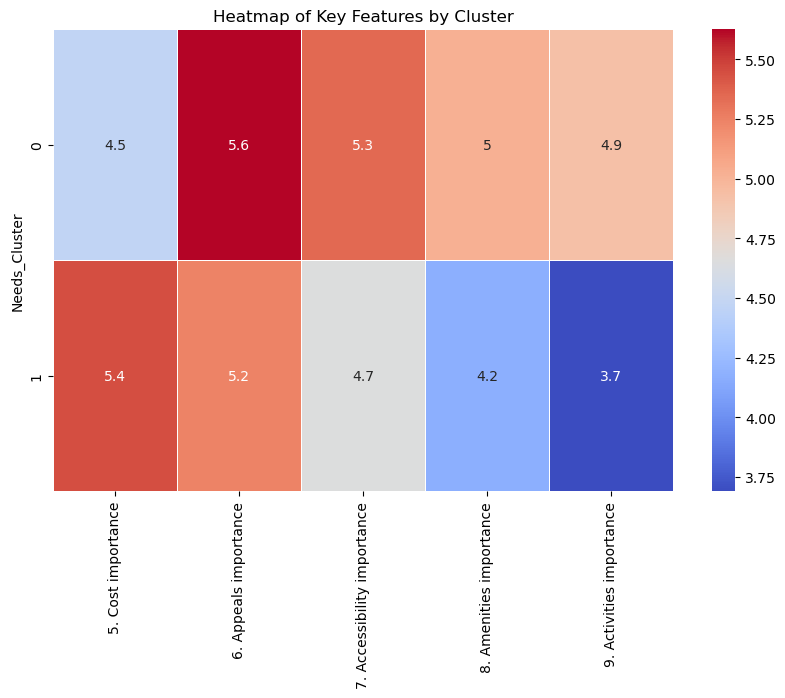

In [28]:
cluster_means = survey_data_cleaned.groupby("Needs_Cluster")[main_features].mean().apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Heatmap of Key Features by Cluster")
plt.show()


### **3.3.3. Cluster Size Distribution**

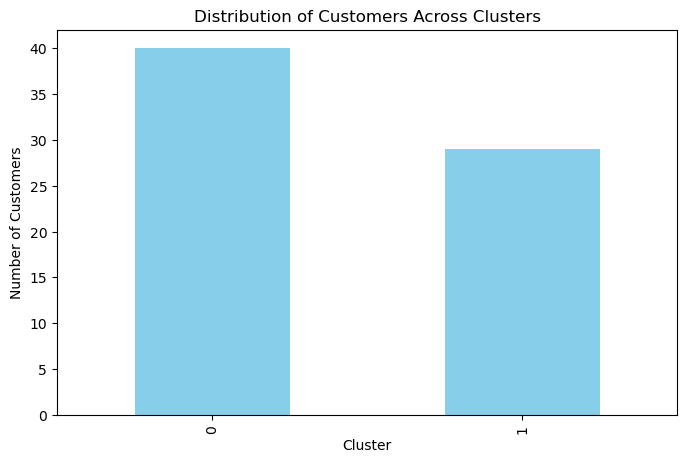

In [29]:
plt.figure(figsize=(8, 5))
survey_data_cleaned["Needs_Cluster"].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers Across Clusters")
plt.show()


### **3.3.4. Boxplots of Key Features by Cluster**

/var/folders/0j/9c1djdg57yqghf3xt5yxmgnw0000gn/T/ipykernel_7422/875818476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Needs_Cluster", y=feature, data=survey_data_cleaned, palette="Set3")


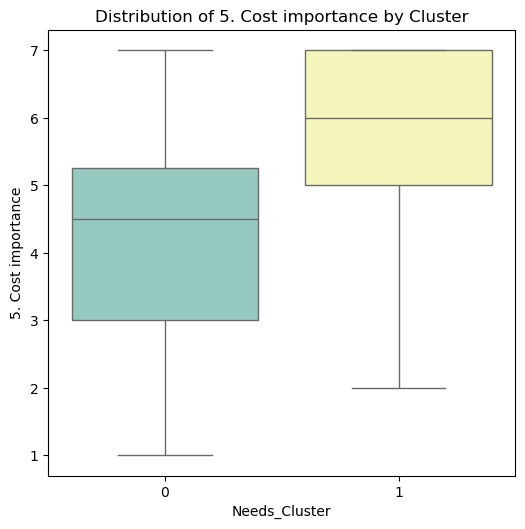

/var/folders/0j/9c1djdg57yqghf3xt5yxmgnw0000gn/T/ipykernel_7422/875818476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Needs_Cluster", y=feature, data=survey_data_cleaned, palette="Set3")


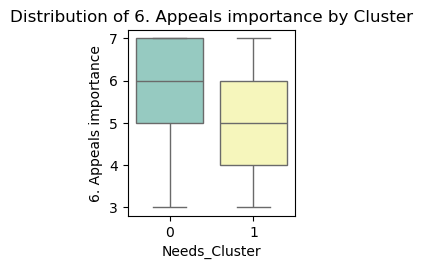

/var/folders/0j/9c1djdg57yqghf3xt5yxmgnw0000gn/T/ipykernel_7422/875818476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Needs_Cluster", y=feature, data=survey_data_cleaned, palette="Set3")


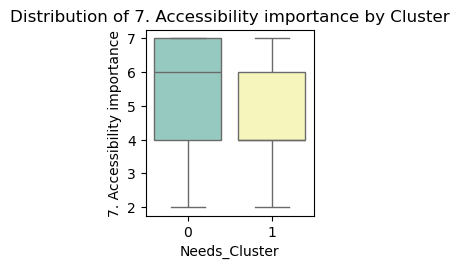

/var/folders/0j/9c1djdg57yqghf3xt5yxmgnw0000gn/T/ipykernel_7422/875818476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Needs_Cluster", y=feature, data=survey_data_cleaned, palette="Set3")


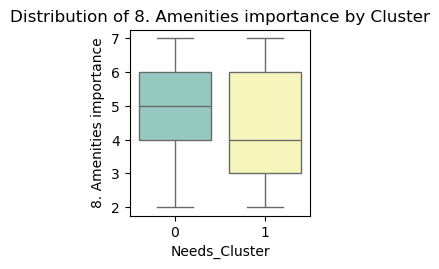

/var/folders/0j/9c1djdg57yqghf3xt5yxmgnw0000gn/T/ipykernel_7422/875818476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Needs_Cluster", y=feature, data=survey_data_cleaned, palette="Set3")


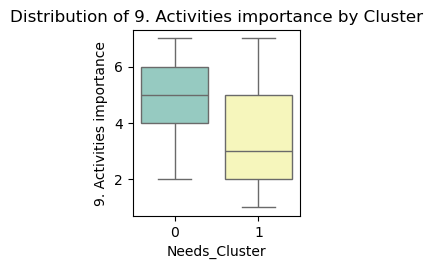

In [30]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(main_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="Needs_Cluster", y=feature, data=survey_data_cleaned, palette="Set3")
    plt.title(f"Distribution of {feature} by Cluster")
    plt.tight_layout()
    plt.show()


### **3.3.5. Radar Chart for Cluster Profiles**

In [31]:
from math import pi


In [32]:
# Prepare data for radar chart
cluster_profiles = survey_data_cleaned.groupby('Needs_Cluster')[main_features].mean().reset_index()

# Normalize data for better comparison
radar_data = cluster_profiles.set_index('Needs_Cluster')
radar_data = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())

# Number of variables
categories = list(radar_data.columns)
N = len(categories)


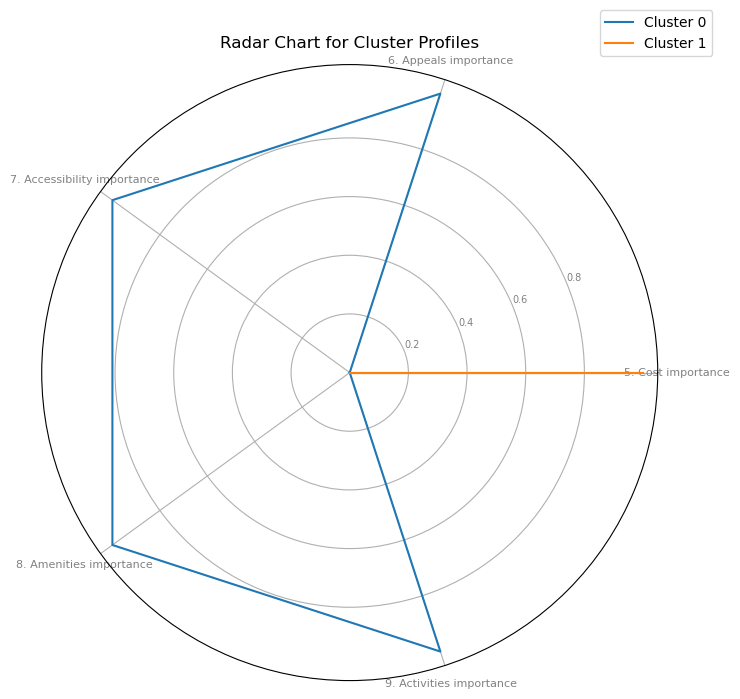

In [33]:
# Create the radar chart

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
for i, row in radar_data.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {i}')

plt.xticks(angles[:-1], categories, color='grey', size=8)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.title('Radar Chart for Cluster Profiles')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


In [34]:
# Function to predict the segment for a new customer
def predict_segment(new_customer_data):
    # Ensure the data matches the feature structure
    new_customer_df = pd.DataFrame([new_customer_data], columns=features)
    new_customer_scaled = scaler.transform(new_customer_df.fillna(0))
    cluster_label = kmeans_final.predict(new_customer_scaled)
    return cluster_label[0]


In [35]:
# Example usage for a new customer
new_customer_example = {
    '5. Cost importance': 4, '6. Appeals importance': 5, '7. Accessibility importance': 3,
    '8. Amenities importance': 6, '9. Activities importance': 7,
    '10. Pay extra for atmosphere': 1, '11. Pay extra for location': 0,
    '12. Pay extra for amenities': 1, '13. Pay extra for activities': 0,
    '14. Activities over everything else': 1, '15. Amenities over everything else': 0,
    '16. Everything must be perfect': 5, '18. Attitude towards paying': 4,
    '19. decide on friends’ or social media recom': 1, '21. Gender': 1, '22. Age': 30,
    '4. Motivation_Adventure and excitement': 3, '4. Motivation_Other (please only choose if fits best)': 0,
    '4. Motivation_Relaxation and escaping routine': 2,
    '4. Motivation_Socializing and meeting new people': 1,
    '17. Single important factor_Broad choice of activities': 0,
    '17. Single important factor_Convenient or appealing location': 1,
    '17. Single important factor_High-quality amenities': 0,
    '17. Single important factor_Lowest price': 1,
    '17. Single important factor_Others': 0,
    '17. Single important factor_Outstanding visual and Appealing atmosphere': 1
}

predicted_segment = predict_segment(new_customer_example)
print(f"The new customer belongs to segment: {predicted_segment}")


The new customer belongs to segment: 1


**Key Influential Features by Cluster**

| **Cluster** | **Most Influential Features**                    | **Impact on Segmentation**                                |
|-------------|-------------------------------------------------|----------------------------------------------------------|
| Cluster 0   | Cost Importance, Attitude Towards Paying, Motivation for Relaxation | Indicates price-sensitive customers valuing **affordability** and **relaxation** opportunities. |
| Cluster 1   | Willingness to Pay Extra for Amenities, Activities Over Everything Else, Motivation for Adventure | Represents premium-oriented customers **seeking high-quality** experiences and adventurous activities. |

